<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Hierarchical Clustering - Case Study</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement 

A company in Chicago provides office supplies to several global companies and small businesses. The sales department handles an inventory to keep the track of all the orders (ID of the customer, shipping cost, profit and so on). The last year inventory contains various items like telephone, pen, paper, computer accessories. This data can be more insightful if all the products can be divided into different groups based on certain criteria; for eg. whether the product is a machine or a furnishing item or a stationary item. Clustering algorithms can be used to group inventory items that provide more insight into the business.

##  Data Definition (Purchase data)

Here's a brief version of what you'll find in the data


**Products:**: Name of the product

**Prod_id**: Unique ID of the product

**Cust_id**: Unique ID of the customer

**Sales**: Total sales of the order

**Order_Quan**:	Number of products 

**Profit**:	Profit gained on the order (negative value indicates the loss)

**Shipping_Cost**: Cost of shipment for the order

**Product_Base_Margin**: Base margin for the product

**Customer_Segment**: Type of customer (Home office/ Corporate/ Small business)

## Contents

1. **[Import Libraries](#import_lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - [Understand the Data](#read)
    - 2.2 - [Check the Data Type](#dtype)
    - 2.3 - [Remove Insignificant Variables](#drop)
    - 2.4 - [Outlier Analysis and Treatment](#outliers)
    - 2.5 - [Missing Value Analysis and Treatment](#null)
3. **[Hierarchical Clustering](#hierar)**
    - 3.1 - [Scale the Data](#scale)
    - 3.2 - [Build the Model](#model)
    - 3.3 - [Plot the Dendrogram](#dendrogram)
    - 3.4 - [Silhouette Score Method](#silhouette)
4. **[Retrieve the Clusters](#retrieve_clusters)**
    - 4.1 - [Analysis of Cluster_1](#cluster_1)
    - 4.2 - [Analysis of Cluster_2](#cluster_2)

<a id='import_lib'></a>
# 1. Import Libraries

To perform various computations, first load the required libraries in python

In [1]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Understand the Data

#### Read the dataset and print the first five observations.

In [3]:
# load the excel file
# store the data in 'df_prod'
df_prod = pd.read_excel('purchase.xlsx')

# display first five observations using head()
df_prod.head()

,Products,Prod_id,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment
0,COPIERS AND FAX,Prod_16,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE
1,COPIERS AND FAX,Prod_16,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE
2,PAPER,Prod_6,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS
3,PAPER,Prod_6,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS
4,OFFICE MACHINES,Prod_17,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS


Here each product is the identifier for the observation. Thus, we set the variable `Products` as the row index.

In [4]:
# load the excel file 
# set the 1st column as index 
df_prod = pd.read_excel('purchase.xlsx', index_col = 0)

# display first five observations using head()
df_prod.head()

,Prod_id,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment
Products,,,,,,,,
COPIERS AND FAX,Prod_16,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE
COPIERS AND FAX,Prod_16,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE
PAPER,Prod_6,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS
PAPER,Prod_6,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS
OFFICE MACHINES,Prod_17,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS


**Let us now see the number of variables and observations in the data.**

In [5]:
# use 'shape' to check the dimension of data
df_prod.shape

(5977, 8)

**Interpretation:** The data has 5977 observations and 8 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [6]:
# use 'dtypes' to check the data type of a variable
df_prod.dtypes

Prod_id                 object
Cust_id                 object
Sales                  float64
Order_Quan               int64
Profit                 float64
Shipping_Cost          float64
Product_Base_Margin    float64
Customer_Segment        object
dtype: object

**Interpretation:** All the variables have correct data type as per the data definition.

<a id="drop"></a>
## 2.3 Remove Unwanted Variables

The column `Prod_id` contains the unique ID of each product, which is redundant for further analysis. Thus, we drop the column.

In [7]:
# drop the column 'Prod_id' using drop()
# 'axis = 1' drops the specified column
df_prod = df_prod.drop('Prod_id',axis=1)

<a id="outliers"></a>
## 2.4 Outlier Analysis and Treatment

**Check the outliers in all the variables and treat them using appropriate techniques.**

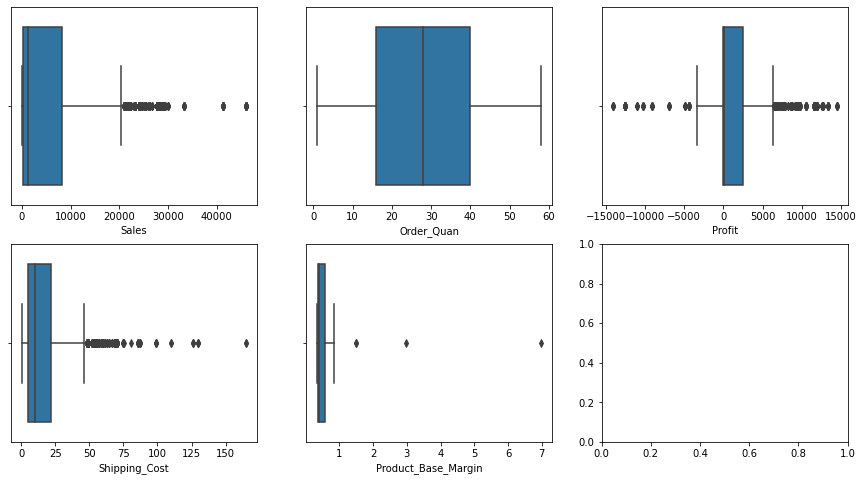

In [8]:
# consider the numeric variables
df_num = df_prod.drop(['Cust_id', 'Customer_Segment'], axis = 1)

# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_prod[variable], ax = subplot)

# display the plot
plt.show()

We can see that the outliers are present in all the variables except `Order_Quan`. Before clustering, we remove the outliers using IQR method.

In [9]:
# calculate the first quartile
Q1 = df_prod.quantile(0.25)

# calculate the third quartile
Q3 = df_prod.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_prod = df_prod[~((df_prod < (Q1 - 1.5 * IQR)) | (df_prod > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_prod.shape

(5192, 7)

We again plot the boxplot for each variable to recheck the outliers.

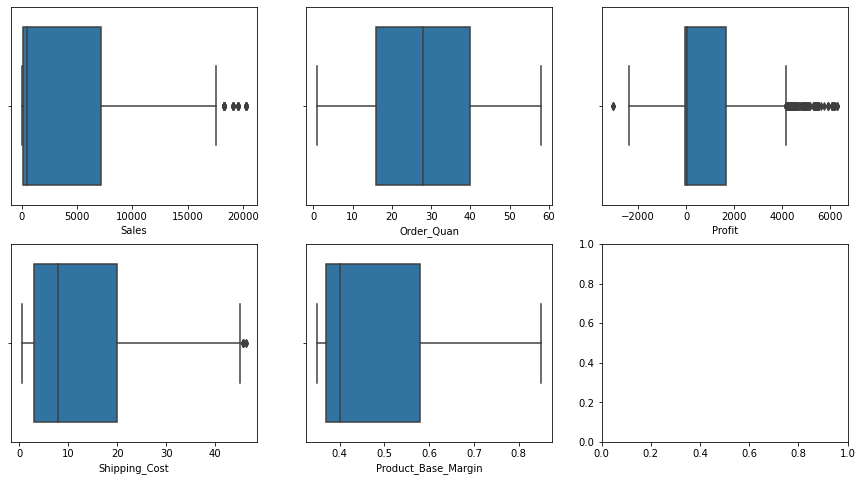

In [10]:
# consider the numeric variables
df_num = df_prod.drop(['Cust_id', 'Customer_Segment'], axis = 1)

# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_prod[variable], ax = subplot)

# display the plot
plt.show()

**Interpretation:** Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that we can see in some of the variables are moderate outliers that lied within the min/max range before removing the actual outliers.

Also, the number of observations is reduced from 5977 to 5192. Thus, we have removed the potential outliers.

<a id="null"></a>
## 2.5  Missing Value Analysis and Treatment

**Check the presence of missing values in the data and treat them.**

In [11]:
# sorting the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_prod.isnull().sum().sort_values(ascending = False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_prod.isnull().sum()*100/df_prod.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Customer_Segment,0,0.0
Product_Base_Margin,0,0.0
Shipping_Cost,0,0.0
Profit,0,0.0
Order_Quan,0,0.0
Sales,0,0.0
Cust_id,0,0.0


**Interpretation:** The above output shows that there are no missing values in the data.

<a id='hierar'></a>
# 3. Hierarchical Clustering

It is the hierarchy based clustering method. `Agglomerative` and `Divisive` clustering are the two types of hierarchical clustering. 

In this session, we consider the Agglomerative clustering. In this method, each data point is considered as a single cluster and these clusters are grouped to form bigger clusters and eventually the single cluster of all the observations is created.

<a id="scale"></a>
## 3.1 Scale the Data

Each of the variables in the data has a different value range. Some features can dominate solely; because they tend to have larger values than others. To avoid this problem, we can scale the variables to get them in the same range.

To group the data, we do not need the variables 'Cust_id' and 'Customer_Segment', so we remove these variables and use the remaining variables to build the model.

In [12]:
# select the variables for model building and store it in 'features'
features = df_prod[['Sales', 'Order_Quan', 'Profit', 'Shipping_Cost', 'Product_Base_Margin']]

In [13]:
# instantiate the 'StandardScaler'
scaler = StandardScaler()

# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
# name the standardized data as 'features_scaled'
features_scaled = scaler.fit_transform(features)

Now, we use the scaled data for model building.

<a id="model"></a>
## 3.2 Build the Model

To perform hierarchical clustering, we need to specify the number of required clusters to the `AgglomerativeClustering()` from the scikit-learn library.

To find the optimal number of clusters, we consider two methods: `Dendrogram` and `Silhouette Score Method`.

First, we find the linkage matrix. It represents the distance between the clusters based on the given linkage method. There are several linkage methods like `single`, `complete`, `average`, `centroid` `ward`. Here we use the `ward linkage` to calculate the linkage matrix. For most of the datasets, this method returns most explicit clusters.

In [14]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(features_scaled, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[1113. 1253.    0.    2.]
 [1903. 5192.    0.    3.]
 [1133. 2146.    0.    2.]
 [1234. 1544.    0.    2.]
 [1656. 5195.    0.    3.]
 [1883. 5196.    0.    4.]
 [4320. 4418.    0.    2.]
 [4436. 5198.    0.    3.]
 [2932. 2988.    0.    2.]
 [2820. 3027.    0.    2.]]


**Interpretation:** The values in the first two columns below n (= 5192) are simply the indices of the observations that are clustered in pairs to form a new cluster. This new cluster is assigned the index value 'n+i' (for ith row). The intermediate clusters going forward, are indexed successively.

The third column represents the cophenetic distances (the height at which the clusters are merged for the first time) between the clusters at each row i, and the fourth column gives the number of observations in that cluster.

For example: The 5th row represents the grouping of 1656th observations and 5195th cluster. Since the dataset is large, most of the observations are merged at 0 height. The new cluster contains 3 data points (i.e. 5195th cluster is a cluster of 2 observations).

<a id="dendrogram"></a>
## 3.3 Plot the Dendrogram

A dendrogram is a visualization in the form of a tree, that represents the order and distances of merges during the hierarchical clustering. The structure of the dendrogram depends on the linkage method used in to calculate the distances between the clusters.

It plots each observation on the x-axis as one cluster in the first step of clustering; i.e. we will have 5192 points on x-axis and ward distance on y-axis. 

We use the dendrogram to find the optimal number of clusters. The number of clusters 'K' that remains constant for the larger distance on the dendrogram represents the optimal value.

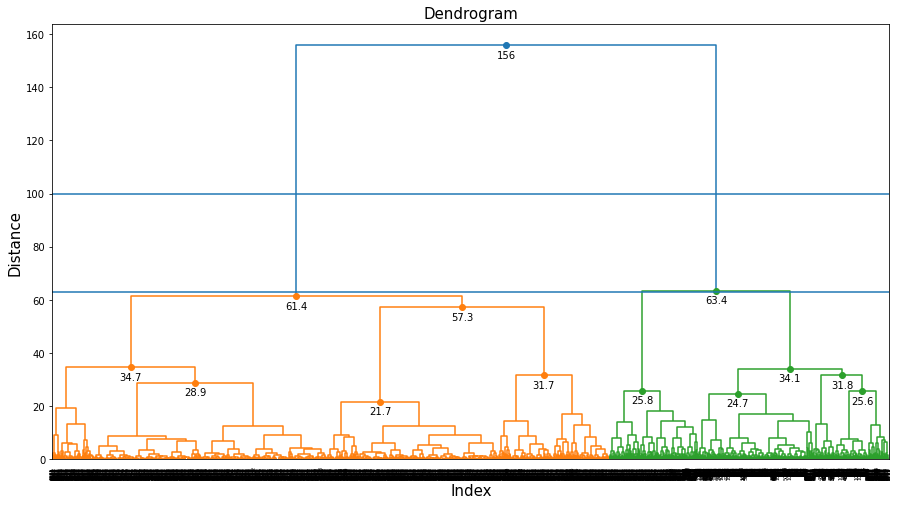

In [15]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)
# annotate the distance on the y-axis for distance > 20
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 20:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        
        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

        
# plot the line to cut the dendrogram
plt.axhline(y = 100)
plt.axhline(y = 63)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** 

1) x-axis contains the observations and the y-axis contains the distances computed using the 'ward' method. 

2) Horizontal lines show the merging of the clusters.

3) The topmost line in the dendrogram refers to a single cluster of all the data points.

The above dendrogram shows that the number of clusters (=2) is constant from the distance 63.4 to 156. Thus, we can consider the value 'two' as the optimal number of clusters. The horizontal black line in the dendrogram intersects the vertical lines at two unique points. The different colors below the line correspond to the different clusters.

#### Let us calculate the Cophenetic correlation coefficient to study the quality of clusters formed using dendrogram.

In [16]:
# calculate the euclidean distance between the observations 
eucli_dist = euclidean_distances(features_scaled)
print(eucli_dist, "\n")
# the above code will return the matrix of 5192x5192
# consider only the array of upper triangular matrix
# k=1 considers the upper triangular values without the diagonal elements
dist_array = eucli_dist[np.triu_indices(5192, k = 1)]

# pass the linkage matrix and actual distance
# 1st output of the cophenet() is the correlation coefficient
coeff, cophenet_dist = cophenet(link_mat, dist_array)

# print the cophenetic correlation coefficient
print(coeff)

[[0.         0.96036824 3.94438411 ... 2.39147015 2.57715092 3.57373683]
 [0.96036824 0.         3.71232751 ... 2.02438516 2.49956415 3.71559962]
 [3.94438411 3.71232751 0.         ... 3.99227949 5.15347532 6.42909235]
 ...
 [2.39147015 2.02438516 3.99227949 ... 0.         1.46192411 2.96575804]
 [2.57715092 2.49956415 5.15347532 ... 1.46192411 0.         1.57404309]
 [3.57373683 3.71559962 6.42909235 ... 2.96575804 1.57404309 0.        ]] 

0.7772274556460057


**Interpretation:** The value of cophenetic correlation coefficient is 0.7772. The value close to 1 indicates the best linkage quality. Here we can say that the linkage quality is good.

<a id="silhouette"></a>
## 3.4 Silhouette Score Method

The Silhouette score can also be used to identify the optimal number of clusters. We plot the Silhouette score for different values of K. The `K` with the highest Silhouette score represents the optimal value for the number of clusters (K).

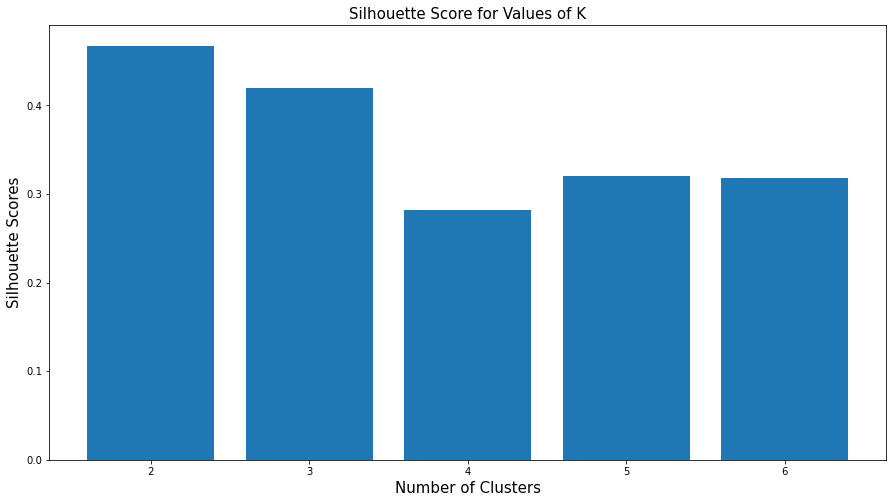

In [17]:
# consider different values of K
K = [2,3,4,5,6]

# consider an empty list tot store the Silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    model = AgglomerativeClustering(n_clusters = i) 
    
    # calculate the Silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(features_scaled, model.fit_predict(features_scaled))) 
    
# plot the Silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above plot shows that the Silhouette score for K = 2 is the highest. This imlpies that K = 2 is the optimal value for number of clusters.

Both the dendrogram and Silhouette score method returns K = 2 as the optimal value for the number of clusters. Now we retrieve the clusters and let us visualize the data.

<a id='retrieve_clusters'></a>
# 4. Retrieve the Clusters

Let us use `AgglomerativeClustering()` to form two clusters. 

In [18]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

# fit the model on the scaled data
clusters.fit(features_scaled)

AgglomerativeClustering()

In [19]:
# add a column containing cluster number to the original data
df_prod['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df_prod.head()

,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment,Cluster
Products,,,,,,,,
COPIERS AND FAX,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE,0
COPIERS AND FAX,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE,0
PAPER,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS,1
PAPER,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS,1
OFFICE MACHINES,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS,0


Check the size of each cluster.

In [20]:
# check the size of each cluster
df_prod['Cluster'].value_counts()

1    3459
0    1733
Name: Cluster, dtype: int64

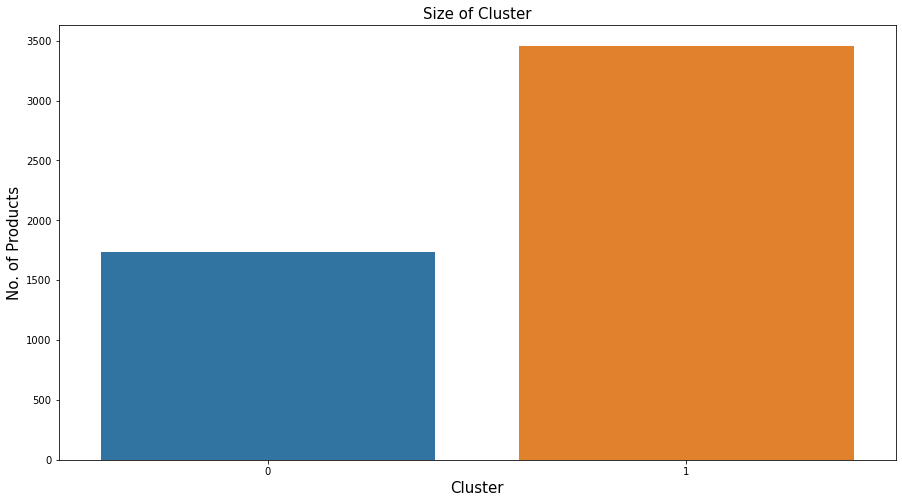

In [21]:
# plot the countplot for the cluster size
sns.countplot(data = df_prod, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)

# display the plot
plt.show()

Now let us visualize the clusters. As we have more than 2 features, we consider only the variables `Sales` and `Profit` to visualize the clusters.

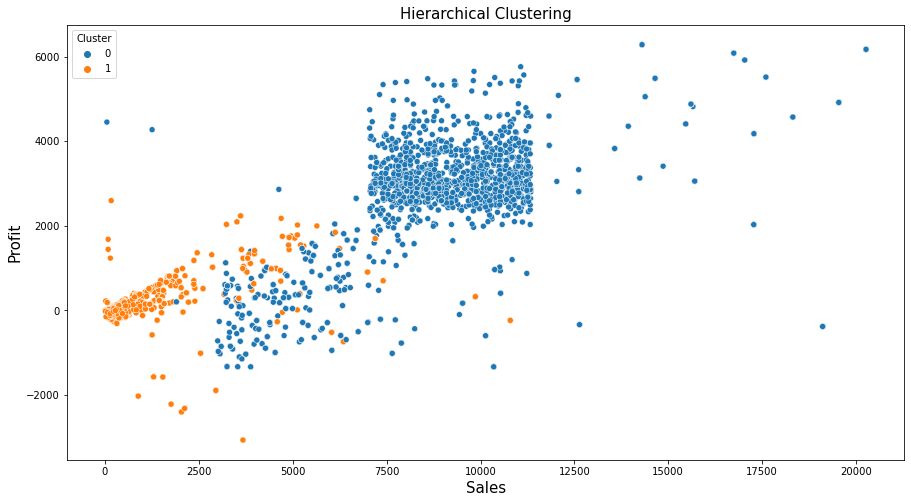

In [22]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'Sales', y = 'Profit', data = df_prod, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('Sales', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The largest cluster is shown by the orange color in the above plot.

<a id='cluster_1'></a>
## 4.1 Analysis of Cluster_1

#### Check the size of the cluster

In [23]:
# size of a cluster_1
df_prod['Cluster'].value_counts()[0]

1733

#### Classify products belonging to the cluster 

In [24]:
# first 10 products in the cluster_1
df_prod[df_prod.Cluster == 0].head(10)

,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment,Cluster
Products,,,,,,,,
COPIERS AND FAX,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE,0
COPIERS AND FAX,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE,0
OFFICE MACHINES,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS,0
COPIERS AND FAX,Cust_1388,10378.641,54,5504.10,27.99,0.56,SMALL BUSINESS,0
COPIERS AND FAX,Cust_1052,11135.641,27,3317.67,17.50,0.59,HOME OFFICE,0
COPIERS AND FAX,Cust_346,11337.641,52,2800.43,20.00,0.60,CORPORATE,0
COPIERS AND FAX,Cust_1440,10992.641,36,3553.31,16.20,0.55,HOME OFFICE,0
COPIERS AND FAX,Cust_444,10314.641,24,2954.96,21.69,0.57,CORPORATE,0
BINDERS AND BINDER ACCESSORIES,Cust_513,9553.641,48,2736.56,20.03,0.39,CORPORATE,0


#### Compute the statistical summary for the products in this cluster

In [25]:
# statistical summary of the numerical variables
df_prod[df_prod.Cluster==0].describe()

,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Cluster
count,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.0
mean,8854.202957,32.787074,2513.388575,22.603312,0.592845,0.0
std,3412.481083,12.444343,1625.736002,6.892565,0.124358,0.0
min,50.190000,7.000000,-1331.550000,5.000000,0.350000,0.0
25%,7131.641000,22.000000,1389.180000,18.250000,0.550000,0.0
50%,8646.641000,33.000000,2860.710000,21.210000,0.580000,0.0
75%,10474.641000,43.000000,3461.590000,25.000000,0.660000,0.0
max,20265.220000,58.000000,6279.180000,46.200000,0.850000,0.0


In [26]:
# summary of the categorical variables
df_prod[df_prod.Cluster==0].describe(include = object)

,Cust_id,Customer_Segment
count,1733,1733
unique,964,3
top,Cust_1445,CORPORATE
freq,9,688


**Interpretation:** The above summary shows that the average sales of the products in this cluster is 8854.20 dollars. On average, the order quantity is 33. The customer with ID `Cust_1445` has placed 9 orders. Approximately 40% of the orders are from corporate companies.

In [27]:
# check the count of different products belonging to cluster_1
df_prod[df_prod.Cluster==0].index.value_counts()

TELEPHONES AND COMMUNICATION      862
VENDING MACHINE                   220
COMPUTER PERIPHERALS              218
AIR CONDITIONER                   208
COPIERS AND FAX                    60
OFFICE MACHINES                    59
PAPER                              37
BINDERS AND BINDER ACCESSORIES     31
LABELS                             20
RUBBER BANDS                       17
ENVELOPES                           1
Name: Products, dtype: int64

**Interpretation:** The above output shows that the majority of the products in this cluster are technical items (telephone and communication, vending machine, computer peripherals and so on). Thus, we can segment this cluster under `Technology`.

<a id='cluster_2'></a>
## 4.2 Analysis of Cluster_2

#### Check the size of the cluster

In [28]:
# size of a cluster_2
df_prod['Cluster'].value_counts()[1]

3459

#### Classify products belonging to the cluster 

In [29]:
# first 10 products in the cluster_2
df_prod[df_prod.Cluster == 1].head(10)

,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment,Cluster
Products,,,,,,,,
PAPER,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS,1
PAPER,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS,1
ENVELOPES,Cust_604,891.641,39,31.41,25.08,0.39,CORPORATE,1
ENVELOPES,Cust_1056,100.641,26,48.04,21.99,0.39,HOME OFFICE,1
PENS & ART SUPPLIES,Cust_632,683.641,26,35.82,2.99,0.46,CORPORATE,1
PENS & ART SUPPLIES,Cust_616,90.641,21,14.54,18.50,0.35,CORPORATE,1
PENS & ART SUPPLIES,Cust_1155,82.641,17,5.86,7.03,0.59,HOME OFFICE,1
PENS & ART SUPPLIES,Cust_1335,48.641,9,4.68,3.99,0.47,CORPORATE,1
ENVELOPES,Cust_944,81.641,14,21.08,22.99,0.37,SMALL BUSINESS,1


#### Compute the statistical summary for the products in this cluster

In [30]:
# statistical summary of the numerical variables
df_prod[df_prod.Cluster==1].describe()

,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Cluster
count,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.0
mean,634.822022,24.934374,71.191026,6.036210,0.430624,1.0
std,1215.828643,14.447429,423.035589,5.466886,0.106220,0.0
min,3.420000,1.000000,-3061.820000,0.490000,0.350000,1.0
25%,82.030000,12.000000,-47.150000,1.490000,0.370000,1.0
50%,192.580000,25.000000,-1.060000,5.270000,0.380000,1.0
75%,495.825000,37.000000,55.650000,7.780000,0.440000,1.0
max,10791.380000,50.000000,2595.180000,26.000000,0.850000,1.0


In [31]:
# summary of the categorical variables
df_prod[df_prod.Cluster==1].describe(include = object)

,Cust_id,Customer_Segment
count,3459,3459
unique,1385,3
top,Cust_1337,CORPORATE
freq,14,1577


**Interpretation:** The above summary shows that the average sales of the products in this cluster is 634.44 dollars. On average, the order quantity is 25. The customer with ID `Cust_1337` has placed 14 orders in the last year. Approximately 46% of the orders are from corporate companies.

In [32]:
# check the count of different products belonging to cluster_2
df_prod[df_prod.Cluster==1].index.value_counts()

PAPER                             1045
BINDERS AND BINDER ACCESSORIES     811
PENS & ART SUPPLIES                525
LABELS                             301
RUBBER BANDS                       293
ENVELOPES                          242
COMPUTER PERIPHERALS                88
AIR CONDITIONER                     60
VENDING MACHINE                     52
OFFICE MACHINES                     19
TELEPHONES AND COMMUNICATION        14
COPIERS AND FAX                      9
Name: Products, dtype: int64

**Interpretation:** The above output shows that the majority of the products in this cluster are stationary items (paper, pen and art supplies, binders and bineder accessories and so on). Thus, we can segment this cluster under `Stationary`.